# LAB2

In [9]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
import skimage as sk
import pandas as pd

### **Question 1**
Generate the modified Shepp-Logan phantom using shepp_logan_phantom. Use
the function rescale to get a 256x256 dimension.

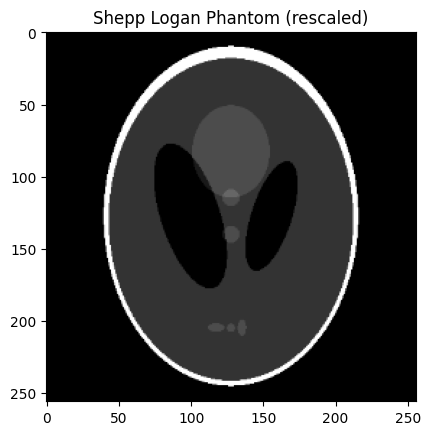

In [10]:
shepp = sk.data.shepp_logan_phantom()
#plt.imshow(shepp, cmap='gray')
# get shepp shape
shepp_shape = shepp.shape
#print(shepp_shape)
# rescale shepp to 256x256 with the function rescale
# como saber o scaling factor? regra de 4 simples: 400 --> 1 , 256 --> x
shepp_rescaled = sk.transform.rescale(shepp, 256/shepp_shape[0], anti_aliasing=False)
shepp_rescaled_shape = shepp_rescaled.shape
#print(shepp_rescaled_shape)
plt.title("Shepp Logan Phantom (rescaled)")
plt.imshow(shepp_rescaled,cmap='gray')

shepp_256 = shepp_rescaled


### **Question 2**
Simulate the sinogram obtained by collecting projections covering [0;180[° in steps of
1° (using radon), and the associated reconstructed image using filtered backprojection
(using iradon).

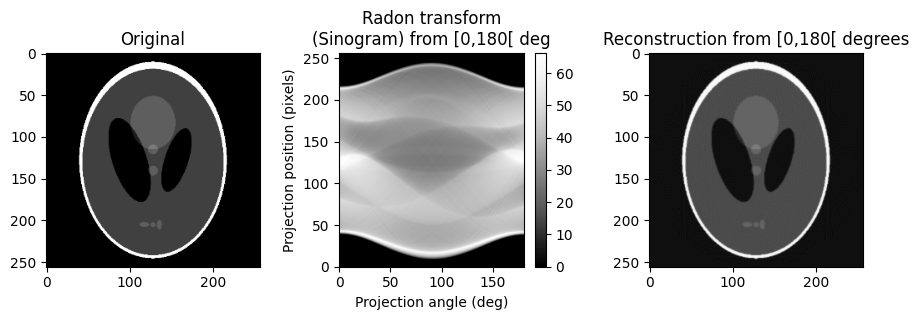

In [11]:
theta = np.arange(0,180,1) # theta vector

# get sinogram
sinogram = sk.transform.radon(shepp_256, theta=theta) 

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(9, 3.3))

ax1.set_title("Original")
ax1.imshow(shepp_256, cmap=plt.cm.Greys_r)

dx, dy = 0.5 * 180.0 / max(shepp_256.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram) from [0,180[ deg")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
sin1 = ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')


rec = sk.transform.iradon(sinogram, theta=theta)
ax3.set_title("Reconstruction from [0,180[ degrees")
ax3.imshow(rec, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.colorbar(sin1)
plt.show()




The radon transform is a set of intensity projections along different angles of incidence. These intensity projections are integrated values of the attenuation coefficients of the object, with these integrations being done along straight lines through the object, so called line integrals. The attenuation coefficients vary throughout the anatomical slice being imaged, and the projection, for a particular angle, is a function of the distribution of this attenuation constant throughout the slice. The resulting figure is called a Sinogram, where the intensity projections are plotted as a function of the angle (X-axis) and x' (Y-axis).

Regarding the sinogram, there are several sinusoidal bands that represent the scanning of various structures. At 90 degrees there is little attenuation, represented by the dark color, while at 0 degrees there is greater attenuation, indicating projections through denser structures.

The inverse Radon transform is used in computed tomography to reconstruct a 2D image from the measured projections, the sinogram. At the heart of the inverse Radon transform is: the central slice theorem, that states that the 1D Fourier Transform of the object's projection for a certain angle theta is the same as the as taking the corresponding theta slice of the 2D Fourier Transfrom of the object; and filtered back projection, the fourier slice therom implies that the fourier domain of the object is sampled in such a way that low frequencies are sampled much more density than higher frequencies, that's why backprojections are unsharp and blurry, and hence the need of applying a high-pass filter to the detector funtion. It is possible to observe streak artifacts in the reconstructed image. This is because we are not collecting projections of the original image continuously, but in 1 degree steps,so there is always some loss of information.


### **Question 3**
Repeat the simulation in 2., but now covering [0;90[° and [0;360[°, in steps of 1°.
Determine what the minimum angle coverage should be, in theory.

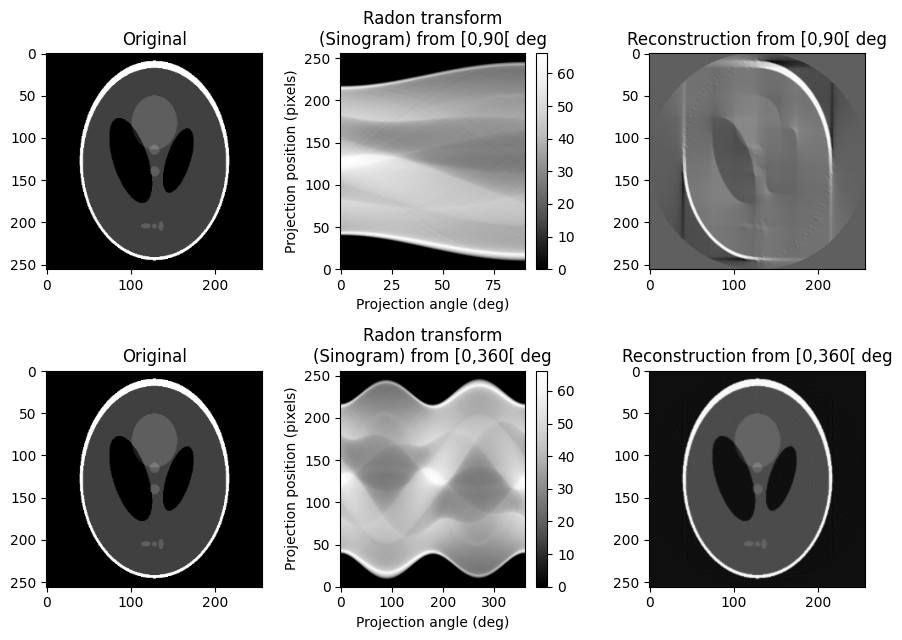

In [12]:
theta90 = np.arange(0,90,1) 
theta360 = np.arange(0,360,1) 

# get sinogram
sinogram90 = sk.transform.radon(shepp_256, theta=theta90)
sinogram360 = sk.transform.radon(shepp_256, theta=theta360) 

fig, ax = plt.subplots(2, 3, figsize=(9, 6.5))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

ax1.set_title("Original")
ax1.imshow(shepp_256, cmap=plt.cm.Greys_r)

dx90, dy90 = 0.5 * 90 / max(shepp_256.shape), 0.5 / sinogram90.shape[0]
ax2.set_title("Radon transform\n(Sinogram) from [0,90[ deg")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")


sin90 = ax2.imshow(sinogram90, cmap=plt.cm.Greys_r,
           extent=(-dx90, 90 + dx90, -dy90, sinogram360.shape[0] + dy90),
           aspect='auto')


rec90 = sk.transform.iradon(sinogram90, theta=theta90)

ax3.set_title("Reconstruction from [0,90[ deg")
ax3.imshow(rec90, cmap=plt.cm.Greys_r)

ax4.set_title("Original")
ax4.imshow(shepp_256, cmap=plt.cm.Greys_r)

dx360, dy360 = 0.5 * 360 / max(shepp_256.shape), 0.5 / sinogram360.shape[0]
ax5.set_title("Radon transform\n(Sinogram) from [0,360[ deg")
ax5.set_xlabel("Projection angle (deg)")
ax5.set_ylabel("Projection position (pixels)")
sin360 = ax5.imshow(sinogram360, cmap=plt.cm.Greys_r,
           extent=(-dx360, 360 + dx360, -dy360, sinogram360.shape[0] + dy360),
           aspect='auto')

rec360 = sk.transform.iradon(sinogram360, theta=theta360)
ax6.set_title("Reconstruction from [0,360[ deg")
ax6.imshow(rec360, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.colorbar(sin90)
plt.colorbar(sin360)
plt.show()

In theory, the minimum angle coverage should be 180 degrees. After 180 degrees, the sinogram repeats itself. In some cases, the redundancy can prove to be useful (i.e, the patient moves during acquisition).

Covering [0,90[º:
As only projections up to 90 degrees are used, the reconstruction obtained is quite incomplete, with large areas of artifacts (namely streak artifacts) observed. 

Covering [0,360[º:
The 360 degree sinogram results from scanning the structure using the full range of possible projection angles. It is observed that after 180 degrees, the information in the sinogram merely matches the previous one, but is inverted. The reconstruction, compared to the one done in question 2, proved to be the same, highlighting the redundancy in using angles beyond 180.

##### Comparing the 180 deg with the 360 deg

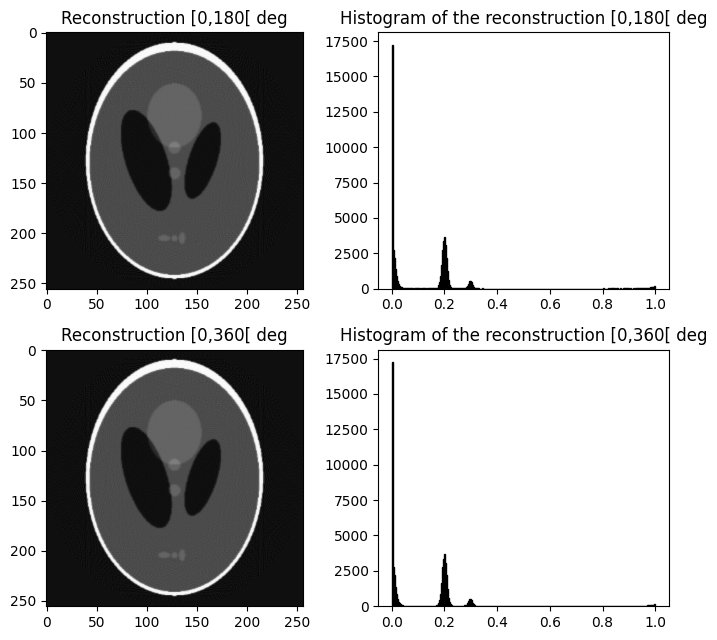

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(7, 6.5))
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.set_title("Reconstruction [0,180[ deg")
ax1.imshow(rec, cmap=plt.cm.Greys_r)

#histogram of the reconstruction
ax2.set_title("Histogram of the reconstruction [0,180[ deg")
ax2.hist(rec.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

ax3.set_title("Reconstruction [0,360[ deg")
ax3.imshow(rec360, cmap=plt.cm.Greys_r)

#histogram of the reconstruction
ax4.set_title("Histogram of the reconstruction [0,360[ deg")
ax4.hist(rec360.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

fig.tight_layout()
plt.show()


In [6]:
booltest = rec==rec360
test = np.all(booltest)
print(test)


False


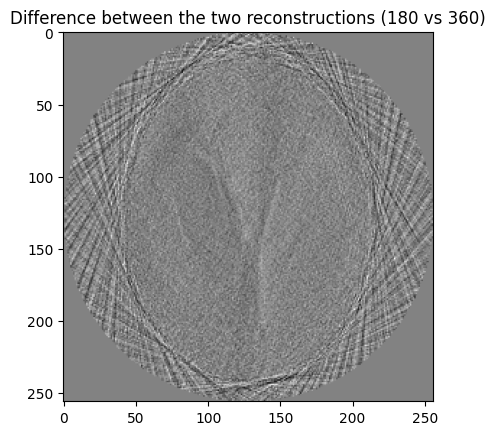

In [14]:
dif = rec-rec360
plt.title("Difference between the two reconstructions (180 vs 360)")
plt.imshow(dif, cmap='gray')

Although still very minimal, the difference is emphasized in the edges! Possibly due to partial volume effect.

### **Question 4**
Repeat the simulation in 2., covering [0;180[°, but now in steps of 5°. Observe the
effects on the sinogram and the reconstructed image.

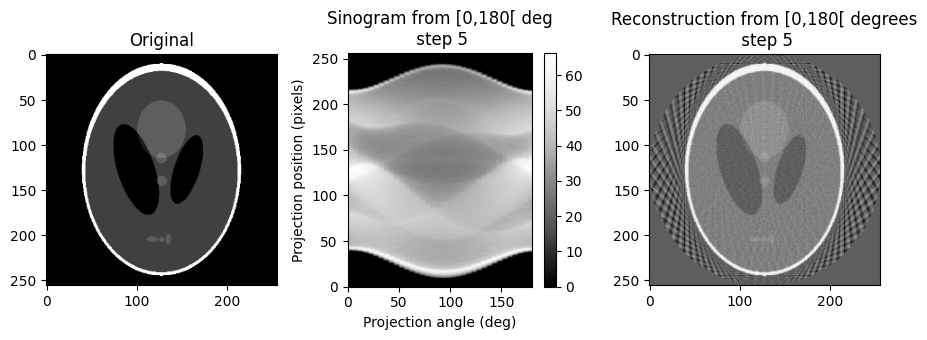

In [15]:
theta5step = np.arange(0,180,5) # theta vector

# get sinogram
sinogram5step = sk.transform.radon(shepp_256, theta=theta5step) 

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(9, 3.5))

ax1.set_title("Original")
ax1.imshow(shepp_256, cmap=plt.cm.Greys_r)

dx, dy = 0.5 * 180.0 / max(shepp_256.shape), 0.5 / sinogram5step.shape[0]
ax2.set_title("Sinogram from [0,180[ deg\n step 5")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
cbstep = ax2.imshow(sinogram5step, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram5step.shape[0] + dy),
           aspect='auto')


rec5step = sk.transform.iradon(sinogram5step, theta=theta5step)
ax3.set_title("Reconstruction from [0,180[ degrees\n step 5")
ax3.imshow(rec5step, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.colorbar(cbstep)
plt.show()

The reconstructed image differs from the original. Since steps of 5 degrees are being considered, there's a lot of information being lost when performing the Radon transform.Since there is more discontinuity, there is more streak artifact. Additionally, in the Sinogram, we can observe some noise that wasn't present when taking steps of 1 degree, this is also a product of gaps of information, discontinuities.

### **Question 5**
Repeat the simulation in 2., by adding noise to the projection data, considering a
maximum sinogram intensity of 255 (using the random.poisson function of the
numpy library; note that values need to be converted to uint8 type (8-bit unsigned
integers) prior to applying this function).

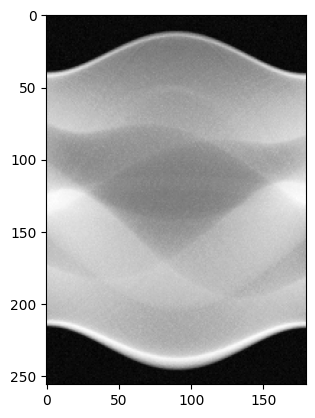

In [16]:
sin0_1 = sinogram.astype(np.float64) / sinogram.max() # normalize the data to 0 - 1
sin_scaled = 255 * sin0_1 # Now scale by 255
sinOG = sin_scaled.astype(np.uint8)

noise_sin = sinOG + np.random.poisson(10, sinOG.shape)

plt.imshow(noise_sin, plt.cm.Greys_r)

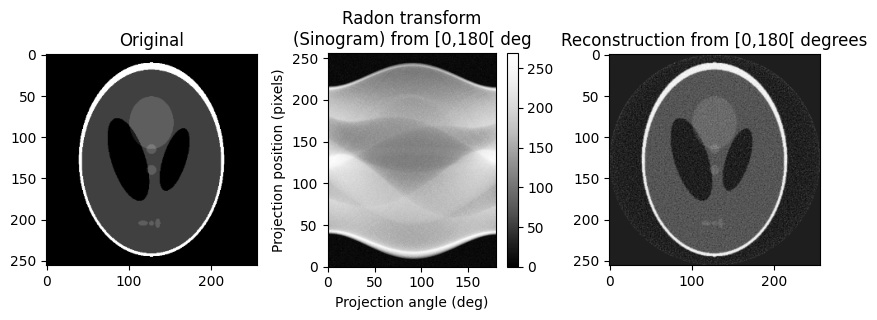

In [17]:
theta = np.arange(0,180,1) # theta vector


fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(8.4, 3.3))

ax1.set_title("Original")
ax1.imshow(shepp_256, cmap=plt.cm.Greys_r)

dx, dy = 0.5 * 180.0 / max(shepp_256.shape), 0.5 / noise_sin.shape[0]
ax2.set_title("Radon transform\n(Sinogram) from [0,180[ deg")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
cbnoise180 = ax2.imshow(noise_sin, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, noise_sin.shape[0] + dy),
           aspect='auto')


rec_noise = sk.transform.iradon(noise_sin, theta=theta)
ax3.set_title("Reconstruction from [0,180[ degrees")
ax3.imshow(rec_noise, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.colorbar(cbnoise180)
plt.show()


Both in the sinogram and in the reconstructed image, static/"rain-like" noise can be observed. When compared to the noise-free reconstructions, this reconstruction presents more artifacts and is slightly less understandable (i.e, edges are blurred, some areas are not as clear as before.)

### **Question 6**

Repeat the simulation in 5., by now considering half of the original tube voltage.
Compare with 5.

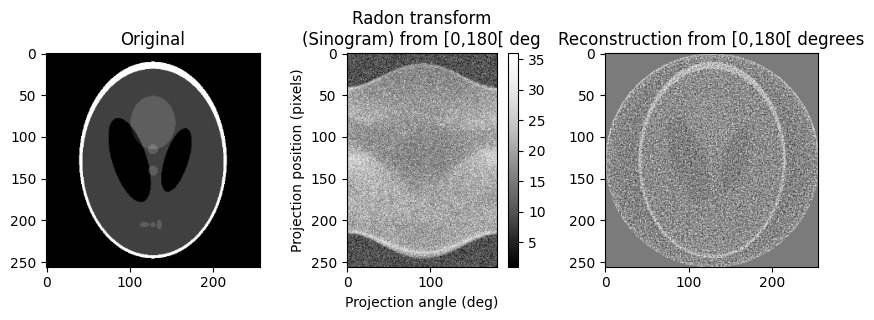

In [18]:
sin_halfvoltage = sinogram * 1/4 
sin_halfvoltage_noise = sin_halfvoltage + np.random.poisson(10, sin_halfvoltage.shape)

theta = np.arange(0,180,1) # theta vector


fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(8.4, 3.3))

ax1.set_title("Original")
ax1.imshow(shepp_256, cmap=plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram) from [0,180[ deg")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
cbhalf = ax2.imshow(sin_halfvoltage_noise, cmap=plt.cm.Greys_r)


rec_half = sk.transform.iradon(sin_halfvoltage_noise, theta=theta)
ax3.set_title("Reconstruction from [0,180[ degrees")
ax3.imshow(rec_half, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.colorbar(cbhalf)
plt.show()


The tube voltage relates to the intensity with the power of two, i.e, intensity is proportional to (kVp)^2. Taking this into consideration, if we're using only half the tube voltage, we will get a quarter of the intensity.

Lower intensity results in less photons, therefore, less signal. As a consequence, the signal to noise ratio will decrease and the same amount of noise becomes more prevelant. This can be observed when comparing the output from Question 6 with Question 5, although the quantity of noise is the same, in Question 6, after reducing the tube voltage (and therefore the signal intesity), both the sinogram and the reconstructed image present much more noise.

In this case, we can hardly distinguish the different areas of Shepp-Logan in the reconstructed image, due to the poor SNR.

### **Question 7**

Repeat the simulation in 6., by replacing the original Ram-Lak filter by modified filters
(available in iradon), and explain the results as a function of their different frequency
responses.

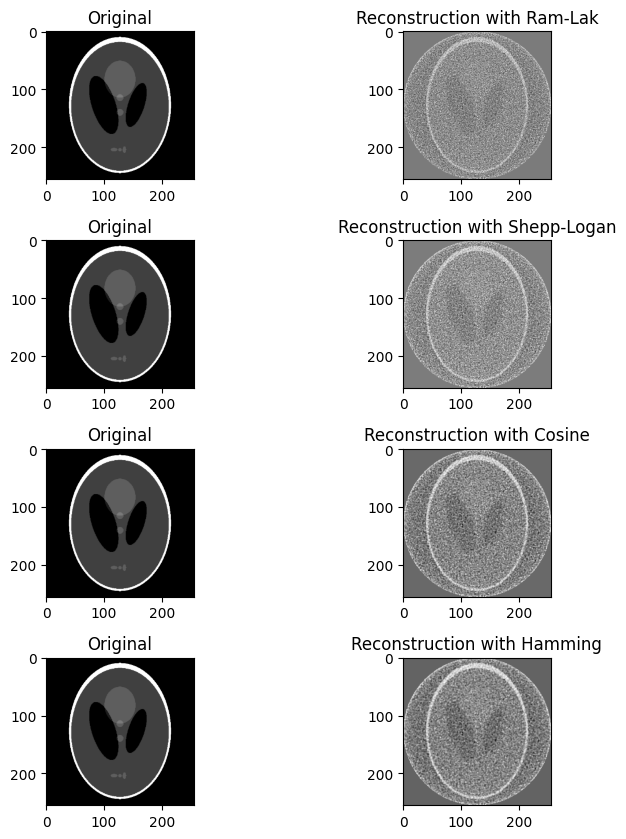

In [19]:
theta = np.arange(0,180,1) # theta vector


fig, ax = plt.subplots(4, 2, figsize=(8.5, 8.5))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8= ax.flatten()

filters = ['ramp', 'shepp-logan', 'cosine', 'hamming']


ax1.set_title("Original")
ax1.imshow(shepp_256, cmap=plt.cm.Greys_r)

rec_half = sk.transform.iradon(sin_halfvoltage_noise, theta=theta, filter_name='ramp' )
ax2.set_title("Reconstruction with Ram-Lak")
ax2.imshow(rec_half, cmap=plt.cm.Greys_r)

ax3.set_title("Original")
ax3.imshow(shepp_256, cmap=plt.cm.Greys_r)

rec_half1 = sk.transform.iradon(sin_halfvoltage_noise, theta=theta, filter_name='shepp-logan')
ax4.set_title("Reconstruction with Shepp-Logan")
ax4.imshow(rec_half1, cmap=plt.cm.Greys_r)

ax5.set_title("Original")
ax5.imshow(shepp_256, cmap=plt.cm.Greys_r)

rec_half2 = sk.transform.iradon(sin_halfvoltage_noise, theta=theta,filter_name='cosine')
ax6.set_title("Reconstruction with Cosine")
ax6.imshow(rec_half2, cmap=plt.cm.Greys_r)

ax7.set_title("Original")
ax7.imshow(shepp_256, cmap=plt.cm.Greys_r)

rec_half3 = sk.transform.iradon(sin_halfvoltage_noise, theta=theta, filter_name='hamming')
ax8.set_title("Reconstruction with Hamming")
ax8.imshow(rec_half3, cmap=plt.cm.Greys_r)

plt.savefig('filters.png')
fig.tight_layout()
plt.show()


Noise is often high frequency. The Ram-Lak filter is a high-pass filter. Therefore, when using this filter, we can see that much noise remains. Shepp-Logan is also a high-pass filter, although it slightly attenuates higher frequencies (when compared to Ram-Lak), the reconstruction still presents much noise. 

Cosine and Hamming are band-pass filters, attenuate low and high frequencies, therefore the noise will be attenuated. It should be noted that the Cosine filter completely "zeros" high frequencies, and since image edges are also high frequency zones these appear a bit faded. However, Hamming appears to be a decent trade off, it attenuates high frequencies, it doesn't completely zero them. This way, noise is removed but edges also appear a bit more prominent, enabling the better visualization of different areas. 

Even with Hamming, which appears to be the best filter, a great amount of noise still remains. To remove this additive type of noise (we summed the Poisson random noise with the original), other filtering techniques can be used, such as averaging or median filtering. Or even other reconstruction techniques like iterative reconstruction. --> "Iterative reconstruction is an algorithmic method that uses statistical and geometric models to variably weight the image data in a process that can be solved iteratively to independently reduce noise and preserve resolution and image quality"

##### Comparison between filters

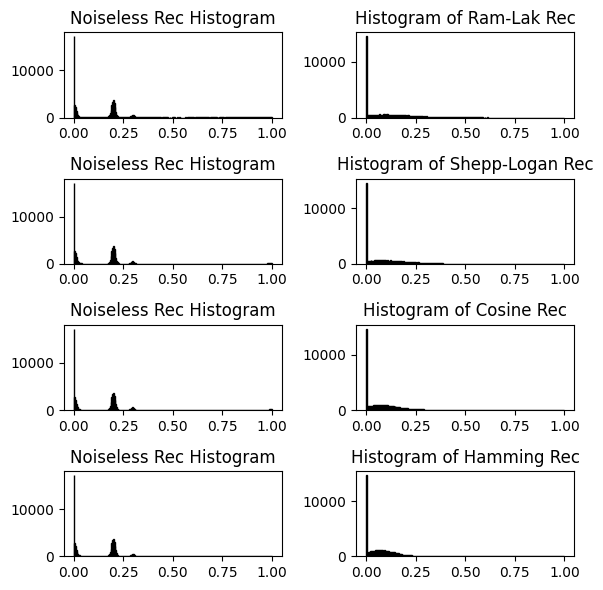

In [58]:
fig, ax = plt.subplots(4, 2, figsize=(6, 6))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8= ax.flatten()


# Histogram of the original image
ax1.hist(rec.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
ax1.set_title("Noiseless Rec Histogram")

# Histogram of the reconstruction with Ram-Lak
ax2.hist(rec_half.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
ax2.set_title("Histogram of Ram-Lak Rec")


# Histogram of the original image
ax3.hist(rec.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
ax3.set_title("Noiseless Rec Histogram")

# Histogram of the reconstruction with Shepp-Logan
ax4.hist(rec_half1.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
ax4.set_title("Histogram of Shepp-Logan Rec")

# Histogram of the original image
ax5.hist(rec.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
ax5.set_title("Noiseless Rec Histogram")

# Histogram of the reconstruction with Cosine
ax6.hist(rec_half2.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
ax6.set_title("Histogram of Cosine Rec")

# Histogram of the original image
ax7.hist(rec.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
ax7.set_title("Noiseless Rec Histogram")

# Histogram of the reconstruction with Hamming
ax8.hist(rec_half3.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
ax8.set_title("Histogram of Hamming Rec")



plt.savefig('histograms.png')
fig.tight_layout()
plt.show()


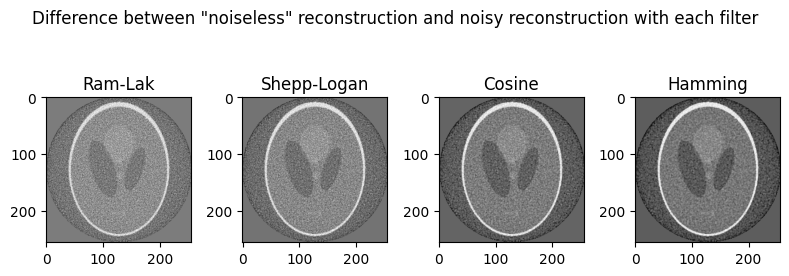

In [59]:
fig, ax = plt.subplots(1, 4, figsize=(8, 3))
ax1, ax2, ax3, ax4 = ax.flatten()

# Difference between original image and reconstruction with Ram-Lak
diff1 = rec - rec_half
ax1.set_title("Ram-Lak")
ax1.imshow(diff1, cmap=plt.cm.Greys_r)

# Difference between original image and reconstruction with Shepp-Logan
diff2 = rec - rec_half1
ax2.set_title("Shepp-Logan")
ax2.imshow(diff2, cmap=plt.cm.Greys_r)

# Difference between original image and reconstruction with Cosine
diff3 = rec - rec_half2
ax3.set_title("Cosine")
ax3.imshow(diff3, cmap=plt.cm.Greys_r)

# Difference between original image and reconstruction with Hamming
diff4 = rec - rec_half3
ax4.set_title("Hamming")
ax4.imshow(diff4, cmap=plt.cm.Greys_r)

fig.suptitle('Difference between "noiseless" reconstruction and noisy reconstruction with each filter')
plt.savefig('differences.png')
fig.tight_layout()
plt.show()

Rationale: we want the differences to become smaller, i.e, closer to 0 which results in an overall darker image! Hamming appears to be the best, but let's check even further...

In [55]:
# turn dif into all positive arrays
diff1 = np.abs(diff1)
diff2 = np.abs(diff2)
diff3 = np.abs(diff3)
diff4 = np.abs(diff4)

# sum all the values of the arrays
sum1 = np.sum(diff1)
sum2 = np.sum(diff2)
sum3 = np.sum(diff3)
sum4 = np.sum(diff4)

# print the sums
print("Sum of the differences between the original image and the reconstruction with Ram-Lak: ", sum1)
print("Sum of the differences between the original image and the reconstruction with Shepp-Logan: ", sum2)
print("Sum of the differences between the original image and the reconstruction with Cosine: ", sum3)
print("Sum of the differences between the original image and the reconstruction with Hamming: ", sum4)

Sum of the differences between the original image and the reconstruction with Ram-Lak:  9028.557569923065
Sum of the differences between the original image and the reconstruction with Shepp-Logan:  8230.448791680803
Sum of the differences between the original image and the reconstruction with Cosine:  7244.758655914531
Sum of the differences between the original image and the reconstruction with Hamming:  6970.405606329113


Hamming has the least difference, it is the best filter out of these.